<p><a href="https://colab.research.google.com/drive/1VX9Cch860eI52dItMkG1ZkQBhBxTJrcO" target="_blank"><img src="https://camo.githubusercontent.com/f5e0d0538a9c2972b5d413e0ace04cecd8efd828d133133933dfffec282a4e1b/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667" alt="Colab" data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg" style="max-width: 100%;"></a></p>

Execute the following code block to import all necessary packages.

# Introduction to Convnet

Convolutional neural networks, or convnets, are widely used in computer vision because they can handle various transformations of the inputs. This is important for vision tasks. For example, even if you see an upside-down picture of a cat, you can still recognize it as a cat.

The main difference between densely connected layers and convolution layers is that dense layers learn global patterns in their input feature space (e.g., for a MNIST digit, patterns involving all pixels), while convolution layers learn local patterns.

Convnets have two cool features:

- They learn *translation-invariant* patterns. Convnets can recognize patterns anywhere in an image after learning them in one part. For example, if a convnet learns to identify a cat's ear in one corner of a picture, it can recognize the ear even if it appears in a different spot. This is different from densely connected networks, which would need to relearn the pattern in each new location. This property is useful because objects in the real world can appear anywhere in an image, so convnets need fewer examples to learn how to recognize them.

- They can learn *spatial hierarchies* of patterns. Convnets can learn complex patterns by building on simpler ones. For example, the first layer of a convnet might learn to detect edges, the next layer might combine those edges to recognize shapes like eyes or noses, and further layers might combine those shapes to recognize faces. This helps convnets understand and interpret images more effectively because the visual world is organized in layers of increasing complexity.
  
Next, we will use a convnet to classify MNIST digits. We previously performed this task using a densely connected network, which achieved a test accuracy of approximately 97.8%. However, even though the convnet we will use is basic, its accuracy will far surpass that of the densely connected model.

In [3]:
from keras.utils import to_categorical
to_categorical([[0], [2], [3]])

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import models, layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import get_file
from keras.utils import to_categorical
from urllib.request import urlopen

base_url = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
            "/master/AIML_for_Business")

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=0);
    # model.save('./model/minst_cnn.keras')
    return model

# model = build_model()
model = models.load_model(get_file(origin=os.path.join(base_url, 'model/minst_cnn.keras')))
model.summary()
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy is {}%'.format(round(test_acc*100,2)))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,646 (729.09 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,324 (364.55 KB)

Test accuracy is 98.33%


The model improvement is about (98.33-98.07)/(100-98.07)% = 20%. The convnet model includes a series of `Conv2D` and `MaxPooling2D` layers, which we will examine in more detail.

## Convolution

The `Conv2D` layer uses the convolution operation, which is explained in the following figure. 

::: {#fig-conv} 
<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/figure/Computer_Vision.gif" width="700">

Convolution
:::

In the example of @fig-conv, the input image has a size of 6x6, and the weight of the layer (called the kernel or filter) is 3x3 with a bias of 0. By sliding a 3x3 region over the input, we generate an output of size 4x4. Specifically, the first output element, -9, is calculated using the element-wise sum-product formula on the top-left 3x3 matrix of the input and the filter as follows:

$$
\begin{pmatrix}
3 & 1 & 1\\
1 & 0 & 6\\
2 & 5 & 7\\
\end{pmatrix} \times
\begin{pmatrix}
1 & 0 & 0\\
1 & 0 & -1\\
0 & 0 & -1\\
\end{pmatrix} = 3 \times 1 + 1 \times 0 + 1 \times 0 + 1 \times 1 + 0\times 0 + 6 \times -1 + 2 \times 0 + 5\times 0 + 7\times -1 = -9
$$

Recall the deep neural network model for MNIST introduced earlier:
```python
    model = models.Sequential(name='mnist_simple')
    model.add(layers.Input(shape=(28 * 28,)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
```
In the first dense layer, we create 512 filters, each with a size of 28x28. Since each filter has the same size as the input image, we have visualized them as heatmap figures earlier. Each filter is compared to the entire input image, meaning dense layers can only learn global patterns. In other words, they process the input image as a whole, capturing overall features rather than localized details.

However, the Conv2D layer, used in the following code snippet:
```python
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
```
uses 32 filters, each of size 3x3, that slide along the input image to capture local patterns. As these filters move across the input image, the convnet can learn translation-invariant patterns.

::: {.callout-note collapse="true" title="padding"}

Note that using a filter will shrink the output dimension. In the previous example, the filter reduced the 6x6 input to a 4x4 output (in general a $k\times k$ filter will reduce the input size by $k-1$). If we want to maintain the same spatial dimensions for the output feature map as the input, we can add an appropriate number of rows and columns on each side of the input feature map with 0 values (see the diagram below). This is known as **padding**, as illustrated in the following figure.

<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/figure/padding.jpg" width="700">

Note that the first output value is now -3, since the top-left 3x3 matrix of the input is after padding:
$$
\begin{pmatrix}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 3\\
\end{pmatrix} 
$$

:::

The following code demonstrates how the convolution operation can detect edges in an image. We set the filter as:

$$
\begin{pmatrix}
-0.125 & -0.125& -0.125\\
-0.125 & 1 & -0.125\\
-0.125 & -0.125 & -0.125\\
\end{pmatrix} 
$$

For every pixel in the image, the filter multiplies it by 1 and subtracts 0.125 of all the surrounding pixel values. This way, the maximum effect is observed at the edges, where there is a stark difference between the pixel value and its surroundings. In any other region, the effect will be canceled out as the filter overall sums to 0.

filter:
 [[-0.125 -0.125 -0.125]
 [-0.125  1.    -0.125]
 [-0.125 -0.125 -0.125]]


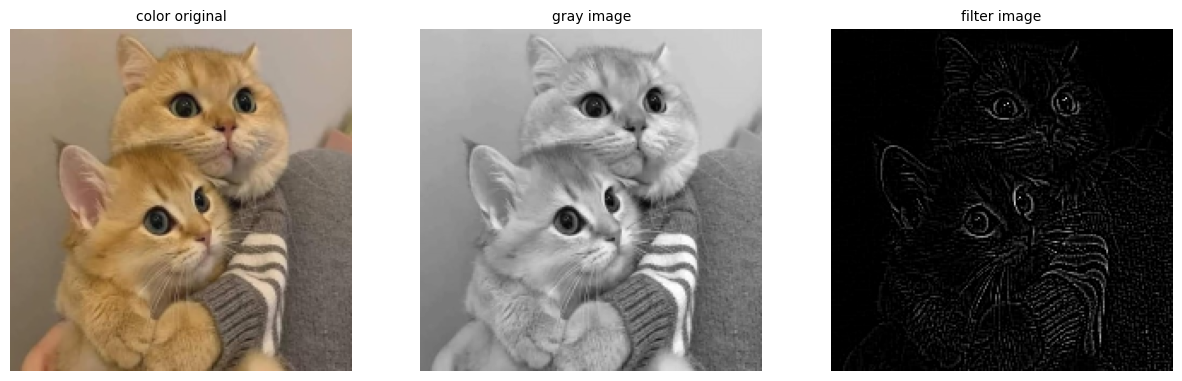

In [5]:


from skimage.color import rgb2gray
from skimage.transform import resize
from scipy.signal import convolve2d

image = resize(plt.imread(urlopen(os.path.join(base_url, "figure/cat.jpg")), format='jpg'), (200,200))

plt.figure(figsize=(15,8))
# plot the original image
plt.subplot(1,3,1)
plt.title('color original', fontsize=10)
plt.axis('off')
plt.imshow(image)

# plot the gray image
gray_img = rgb2gray(image)
plt.subplot(1,3,2)
plt.title('gray image', fontsize=10)
plt.axis('off')
plt.imshow(gray_img, cmap='gray')

# create and print filter
flt = -np.ones((3,3))/8
flt[1,1] = 1
print('filter:\n', flt)

# plot the filtered image
flt_img = convolve2d(gray_img, flt, boundary='symm', mode='same')
plt.subplot(1,3,3)
flt_img = np.maximum(0, flt_img)
plt.title('filter image', fontsize=10)
plt.imshow(flt_img, cmap='gray')
plt.axis('off')
plt.show()

The code contains 3 components. It first plot the color origin image. modify it to a gray image, which is easiler to demonstrate this simple filter to get edge. After we apply the "Convolution" procedure


The code contains three components. First, it plots the original color image. Then, it modifies the image to grayscale, making it easier to to detect edges. After applying the convolution procedure (as illustrated in @fig-conv):

```python
flt_img = convolve2d(gray_img, flt, boundary='symm', mode='same')
```
we plot the filtered image that highlights the edges.

::: {.callout-note collapse="true" title="stride"}

The convolution procedure is very flexible. In @fig-conv, the red region selected from the input slides with a step size of 1. In fact, the step size of sliding a filter is a parameter of the convolution called its stride. In the graph below, the stride is 2 because we slide the filter over the input by 2 tiles.

::: {#fig-stride}
<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/figure/stride.jpg" width="600">

Stride
:::

Using a stride of 2 means the width and height of the feature map are downsampled by a factor of 2. However, strided convolutions are rarely used in practice. To downsample feature maps, we typically use the max-pooling operation instead of strides.

:::

## Max Pooling

The role of max pooling is to aggressively downsample the input image. The code snippet in the example
```python
model.add(layers.MaxPooling2D((2, 2)))
```
shows that, before the first MaxPooling2D layer, the feature map is 26 × 26, but after the max-pooling operation, it is halved to 13 × 13. It works as illustrated in the following figure.

:::{#fig-maxpooling}
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/figure/maxpooling.jpg" width="600">

Maxpooling
:::

- The pooling operation reduces the output size of the convolutional layer. This reduces the number of parameters in the network, which in turn reduces the risk of overfitting.

- The max operation selects the maximum value in each subregion of the input, providing the following benefits:

    - Translation invariance: the output of the operation remains the same even if the input image is shifted slightly. This property makes the network more robust to changes in the position of objects in the input image.

    - Feature learning: the max value helps in identifying the most important features of an image by selecting the strongest feature present in each subregion. This highlights important features of the input image and allows the network to learn more effective representations of the data.
 
::: {.callout-note collapse="true" title="what if without maxpooling"}

Let's consider the option without max pooling layers:

```python
from keras import models, layers
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.summary()
```

The summary of the model is as follows:

| Layer (type) | Output Shape | Param # |
|--------------|--------------|---------|
| conv2d_1 (Conv2D) | (None, 26, 26, 32) | 320 |
| conv2d_2 (Conv2D) | (None, 24, 24, 64) | 18496 |
| conv2d_3 (Conv2D) | (None, 22, 22, 64) | 36928 |   
|Total params: 55,744
|Trainable params: 55,744
|Non-trainable params: 0

Here, None in the output shape represents the batch size, which is the number of input images processed at a time.

@fig-nomaxpool shows how these three Conv2D layers work.

::: {#fig-nomaxpool}
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/figure/nomaxpooling.jpg" width="600">

without maxpooling
:::

The red arrows illustrate how the Conv2D layers downsample the input by converting a region bounded by a red rectangle into a single value through the filter (or weights of the layer). The figure shows that after three Conv2D layers, a 7x7 window of input is converted to a single value. This single value is then used to classify the digit in the image. However, it is impossible to recognize a digit by only looking at it through windows that are 7x7 pixels. We need the features from the last convolution layer to contain information about the entirety of the input.

The final output has 22 $\times$ 22 $\times$ 64 = 30,976 elements per sample. If we were to flatten it and then add a Dense layer of size 64 on top, that layer would have about (30,976 $\times$ 64 $\approx$) 15.8 million parameters. This is far too large for such a small model and would result in overfitting.

In summary, the reasons for using downsampling are to:

- Induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows of input.
  
- Reduce the number of parameters to avoid overfitting.
:::

# Dogs vs. Cats

In this section, we will use a Convolutional Neural Network (CNN) to distinguish between images of dogs and cats. 

To get started, you can download the training and validation data by executing the following code block. This dataset contains images of dogs and cats, which we will use to train and validate our CNN model.

In [28]:
# download training and validation data to current folder
from urllib.request import urlretrieve
import zipfile

# url = base + "/data/dogs-vs-cats_small.zip?raw=true"
filename = "dogs-vs-cats_small.zip"

# Download the file
urlretrieve(os.path.join(base_url, "data/dogs-vs-cats_small.zip?raw=true"), filename)

# Extract the contents of the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

The dataset contains 2,000 training pictures (1,000 cats and 1,000 dogs) and 1,000 validation pictures (500 cats and 500 dogs). We will construct a small CNN to distinguish between images of dogs and cats.

Before we start building our neural network models, we will introduce two functions:

- `validation_plot`, which will plot the training accuracy versus validation accuracy.

- `plot_test_images`, which will show the performance of the model on 20 test pictures (10 cats and 10 dogs).

In [2]:
def validation_plot(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(15, 6))
    # plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and validation accuracy')

    # plt.subplot(1, 2, 2)
    # plt.plot(epochs, loss, 'bo', label='Training')
    # plt.plot(epochs, val_loss, 'r', label='Validation')
    # plt.title('Training and validation loss')
    plt.legend(bbox_to_anchor=(1.02, 0.2), loc=2, borderaxespad=0.5)
    plt.show()
    
def plot_test_images(model):
    fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(20, 5))
    # URLs of cat and dog images
    cat_urls = [os.path.join(base_url, "data/dogs-vs-cats_small_test/cat.{}.jpg?raw=true".format(i)) for i in range(1500, 1510)]
    dog_urls = [os.path.join(base_url, "data/dogs-vs-cats_small_test/dog.{}.jpg?raw=true".format(i)) for i in range(1500, 1510)]

    # Loop over cat and dog images and plot them in corresponding rows
    for i, urls in enumerate([cat_urls, dog_urls]):
        for j, url in enumerate(urls):
            # Load the image from URL
            img = load_img(get_file(f"cats_and_dogs_small_test{i}{j}.jpg", origin=url), target_size=(150, 150))

            # Convert the image to a numpy array 
            # Normalize the image
            img_array = img_to_array(img) / 255

            # Reshape the array and make a prediction
            img_array = img_array.reshape((1,) + img_array.shape)
            prediction = model.predict(img_array, verbose=0)

            # Plot the image and predicted class
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            if prediction < 0.5:
                axs[i, j].set_title('Cat')
            else:
                axs[i, j].set_title('Dog')

    # Show the plot
    plt.show()    

## First Model

We often heard that deep learning requires lots of data. While it is partially true that deep learning requires lots of data, one fundamental characteristic of deep learning is its ability to identify interesting features in the training data on its own. This is especially beneficial for complex input samples, such as images. However, what constitutes 'lots' of samples is relative to the size of the network being trained. 

Convolutional neural networks (convnets) are highly efficient at learning local, translation-invariant features, which makes them highly data efficient for perceptual problems. Even with a small image dataset, training a convnet from scratch can yield reasonable results.

In [4]:
base_url = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
            "/master/AIML_for_Business")

In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# from ipywidgets import interact
from keras import models, layers
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.utils import get_file
from keras.utils import to_categorical, load_img, img_to_array, array_to_img
# from keras.applications import VGG16, xception
from urllib.request import urlopen

def build_model():
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    train_dir = './dogs-vs-cats_small/train'
    validation_dir = './dogs-vs-cats_small/validation'      
    
    # build data generator
    # that can automatically turn image files into batches of preprocessed tensors
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            train_dir,
            # All images will be resized to 150x150
            target_size=(150, 150), batch_size=20,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')

    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
    
    # build model
    model = models.Sequential()
    model.add(layers.Input((150, 150, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))    
    # model.add(layers.Conv2D(32, (3, 3), activation='relu',
    #                         input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['acc'])
    model.save('./model/cats_and_dogs_small_1.keras', include_optimizer=False)
    
    # fit model and get validation information
    history = model.fit(train_generator, steps_per_epoch=100, epochs=30, 
                        validation_data=validation_generator, validation_steps=50, verbose=0)
    with open('./data/history_cats_and_dogs_small_1.pkl', 'wb') as f:
        pickle.dump(history.history, f)
    history = history.history
    
    return model, history

# model, history = build_model()
model = models.load_model(get_file(origin = os.path.join(base_url, 'model/cats_and_dogs_small_1.keras')))
history = pickle.loads(urlopen(os.path.join(base_url, "data/history_cats_and_dogs_small_1.pkl")).read())

model.summary()
validation_plot(history)    
plot_test_images(model)
K.clear_session()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2024-08-03 17:15:09.924265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-03 17:15:09.939376: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-03 17:15:52.599576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-03 17:15:52.612270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-03 17:16:35.287919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-03 17:16:35.299984: W tensorflow/core/framework/local_rendezvous.cc:404]

The accuracy and loss plots are characteristic of overfitting. 

- The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at low percentages. 

- the training loss keeps decreasing linearly until it reaches nearly 0, whereas the validation loss reaches its minimum after only 5-10 epochs. 

Overfitting is a significant concern since we only have 2,000 training samples. This problem is caused by having too few samples to learn from, which can result in an inability to train a model that can generalize to new data. To mitigate this issue, we will use data augmentation, a technique that is specific to computer vision and is almost universally used when processing images with deep-learning models.

## Data Augmentation

Data augmentation is a technique that generates more training data from existing training samples. It works by augmenting the samples through a number of random transformations that yield believable-looking images.

The code block demonstrates the augmented images:

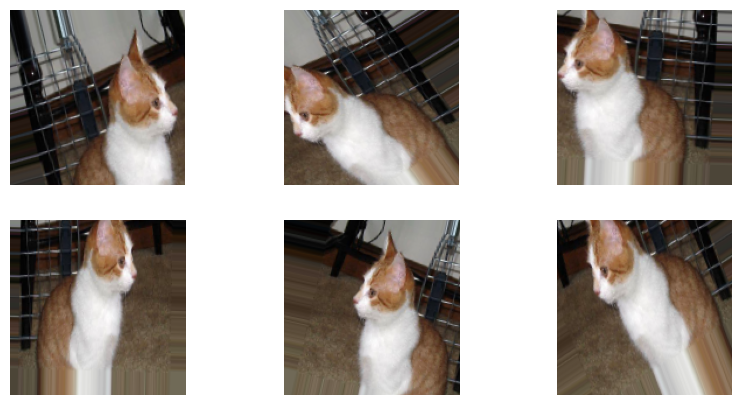

In [21]:
train_dir = './dogs-vs-cats_small/train'
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=40, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest')

index = 0
# We pick one image to "augment"
img_path = os.path.join(
    os.path.join(train_dir, 'cats'), 
    os.listdir(os.path.join(train_dir, 'cats'))[index])

# Read the image and resize it
# Convert it to a Numpy array with shape (150, 150, 3)
x = img_to_array(load_img(img_path, target_size=(150, 150)))
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
fig = plt.figure(figsize=(10,5))
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
for i, batch in enumerate(train_datagen.flow(x, batch_size=1)):
    plt.subplot(2, 3, i+1)
    plt.axis('off')
    plt.imshow(array_to_img(batch[0]))
    if i==5:
        break
plt.show()

With this data-augmentation configuration, the network will now be exposed to many new training inputs.

However, since the augmented samples are based on a limited number of original images and created by remixing existing information, data augmentation alone may not be sufficient to eliminate overfitting. Therefore, a Dropout layer will be added to the model just before the densely connected classifier to further address this issue.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

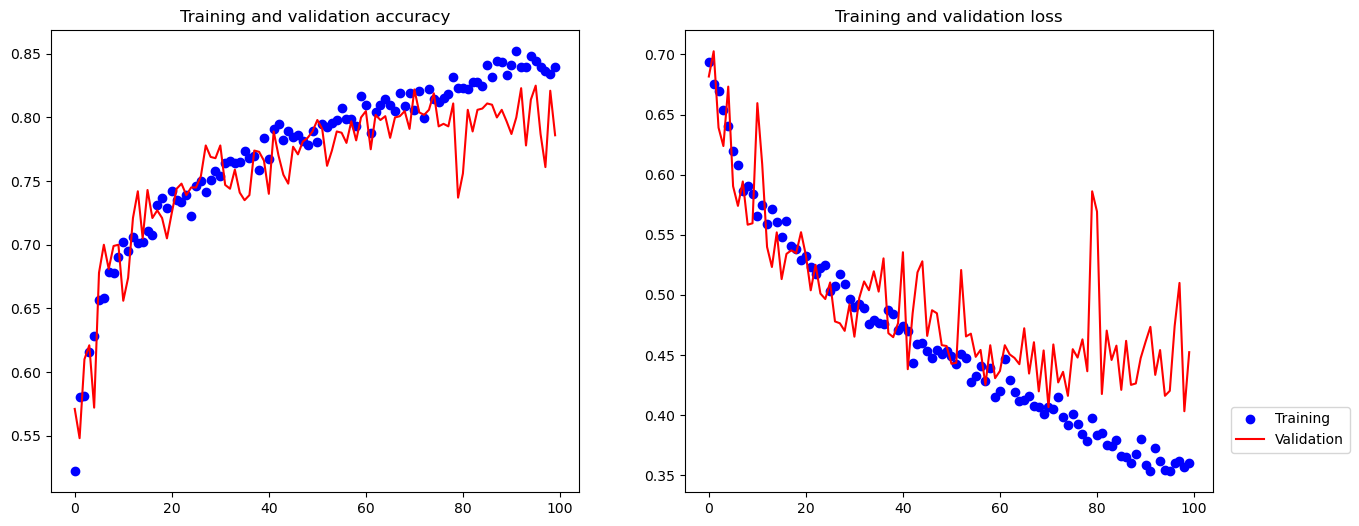

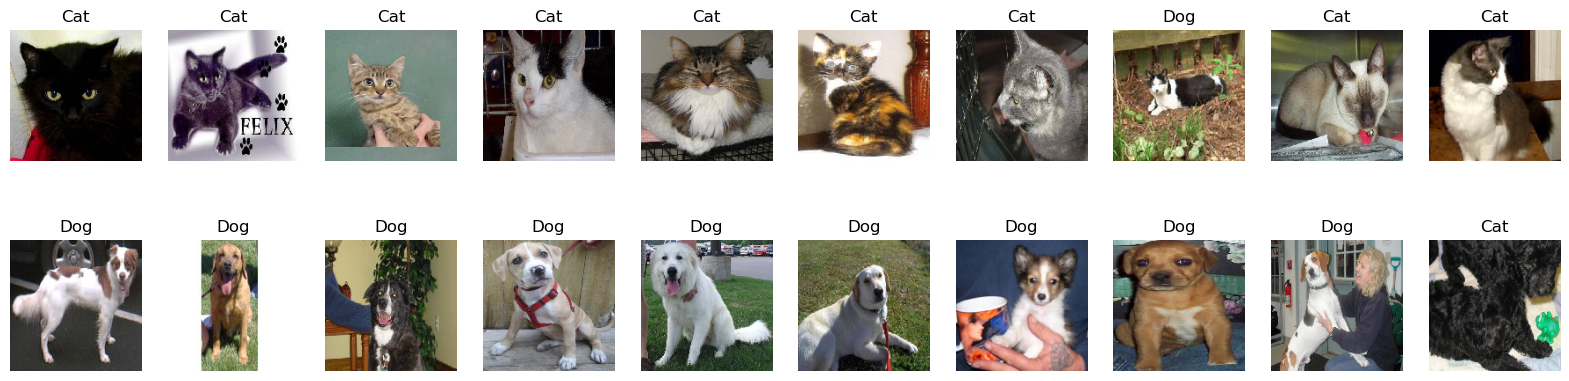

In [31]:
def build_model():
    train_dir = './dogs-vs-cats_small/train'
    validation_dir = './dogs-vs-cats_small/validation'      
    
    # build data generator
    train_datagen = ImageDataGenerator(
        rescale=1./255, rotation_range=40, width_shift_range=0.2,
        height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
        horizontal_flip=True, fill_mode='nearest')
    train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                        batch_size=20, class_mode='binary')
    
    # Note that the validation data should not be augmented!
    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                                  batch_size=20, class_mode='binary')
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])
    
    history = model.fit(train_generator, steps_per_epoch=100, epochs=100, 
                        validation_data=validation_generator, validation_steps=50, verbose=0)
    model.save('./model/cats_and_dogs_small_2.keras', include_optimizer=False)
    with open('./data/history_cats_and_dogs_small_2.pkl', 'wb') as f:
        pickle.dump(history.history, f)
    history = history.history    
    
    return model, history

# model, history = build_model()
model = models.load_model(get_file(origin=os.path.join(base_url, 'model/cats_and_dogs_small_2.h5')))
history = pickle.loads(urlopen(os.path.join(base_url, "data/history_cats_and_dogs_small_2.pkl")).read())    

model.summary()
validation_plot(history)
plot_test_images(model)
K.clear_session()

## Pretrained

One of the benefits of deep learning models is their high degree of reusability. For example, an image-classification or speech-to-text model trained on a large-scale dataset can be adapted to a significantly different problem with only minor adjustments.

There are numerous [pretrained models](https://keras.io/api/applications/) in computer vision publicly available for download, typically trained on the ImageNet dataset. 

Next, we will use the VGG16 model, which has about 15 million parameters, to tackle our problem. Here is a summary of the VGG16 model:

In [120]:
def base_model_summary(include_top):
    
    if include_top:
        input_shape = None
    else:
        input_shape = (150, 150, 3)
    conv_base = VGG16(weights='imagenet', include_top=include_top, input_shape=input_shape)
    print(conv_base.summary())

interact(base_model_summary, include_top=[True, False])

interactive(children=(Dropdown(description='include_top', options=(True, False), value=True), Output()), _dom_…

<function __main__.base_model_summary(include_top)>

We provide three arguments to the VGG16 model constructor:
```python
conv_base = VGG16(weights='imagenet', include_top=, input_shape=)
```
- weights indicates that we are using weights trained on the ImageNet dataset

- include_top argument determines whether or not to include the densely connected classifier on top of the network. By default, this classifier includes the 1,000 classes from ImageNet. Since we will be using our own classifier with only two classes (cat and dog), we don't need to include it. 

- input_shape argument specifies the shape of the image tensors that will be fed to the network. when `include_top=True`, the network input needs to have shape (224, 224, 3). When `include_top=False`, this argument is optional, and if not specified, the network will be able to process inputs of any size. we set it to (150,150,3), which is the shape of our input image.

We will add the VGG16 model as a layer to our own model:
```python
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```

We will freeze the conv_base layer, which means that its weights will **not** be updated during training:
```python
conv_base.trainable = False
```

75706016/75706016 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


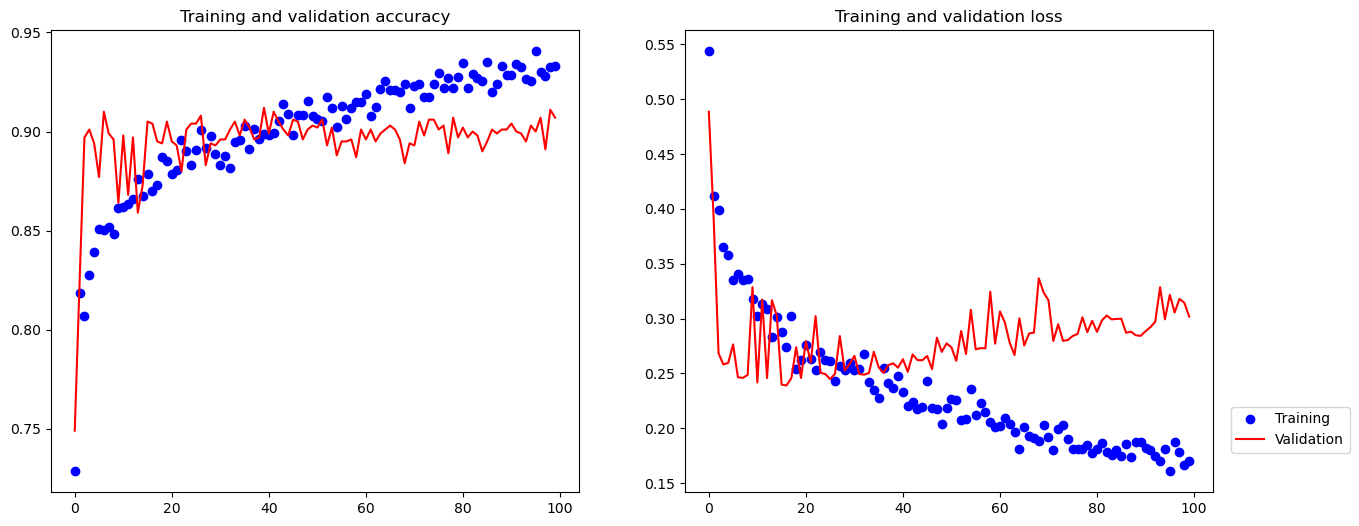

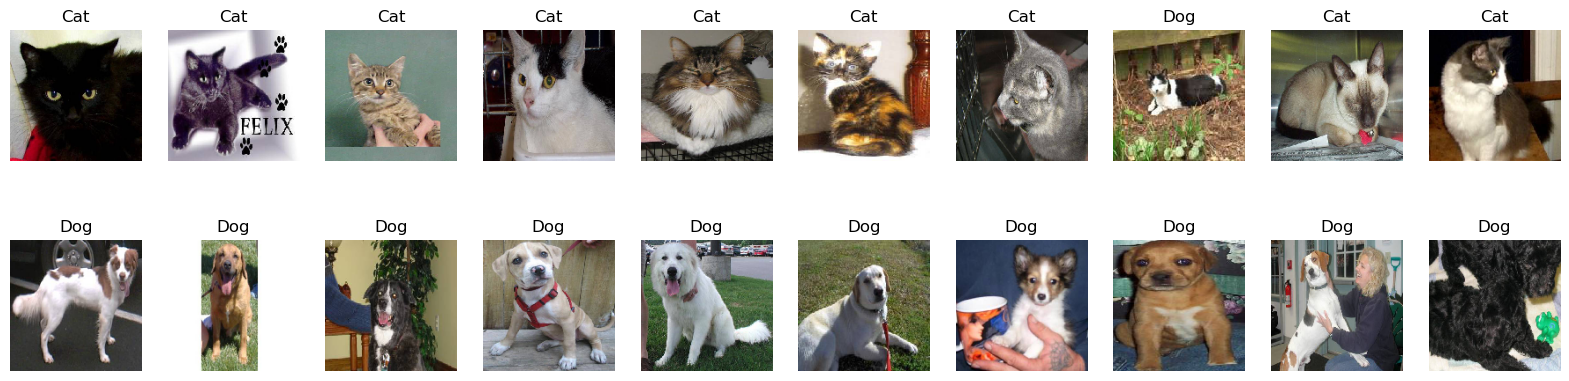

In [6]:
from keras.applications import VGG16

def build_model():
    train_datagen = image.ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                       height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                       horizontal_flip=True, fill_mode='nearest')
    train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                        batch_size=20, class_mode='binary')
    
    # Note that the validation data should not be augmented!
    validation_datagen = image.ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                                  batch_size=20, class_mode='binary')    
    
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    conv_base.trainable = False
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['acc'])
    history = model.fit(train_generator, steps_per_epoch=100, epochs=100, 
                        validation_data=validation_generator, validation_steps=50, verbose=0)
    # model.save('cats_and_dogs_small_3.h5')
    # with open('history_cats_and_dogs_small_3.pkl', 'wb') as f:
    #    pickle.dump(history.history, f)
    history = history.history    
    
    return model, history
    
# model, history = build_model()
model = models.load_model(get_file(origin=os.path.join(base_url, 'data/cats_and_dogs_small_3.h5')))
history = pickle.loads(urlopen(base + "data/history_cats_and_dogs_small_3.pkl").read())

model.summary()
validation_plot(history)
plot_test_images(model)
K.clear_session()    

In this example, we use the convolutional base of VGG16 and add our own dense layers as a classifier. We tune the classifier using our cat and dog image dataset.

We can further fine-tune the network by unfreezing a few of the layers of the VGG16 model so that it can be slightly adjusted for our purpose.

The steps for fine-tuning a network are as follows:

1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

We have already completed the first three steps. For example, we can add the following code to fine-tune the last block of convolutional layers of the VGG16 model

```python
conv_base.trainable = True
for layer in conv_base.layers:
    if layer.name in {'block5_conv1','block5_conv2','block5_conv3'}:
        layer.trainable = True
    else:
        layer.trainable = False
```

You might be wondering why we chose to fine-tune the last block of layers instead of the first block of layers, or why we didn't fine-tune the whole model or more layers.

The answer to the first question will be addressed later when we visualize the Convenet. As for the second question, training more parameters increases the risk of overfitting. With 15 million parameters, it would be risky to attempt to train the entire convolutional base on our small dataset.

# Visualizing Convnets

It is commonly said that deep learning models are "black boxes" because they learn complex representations that are difficult to interpret and present in a human-readable form. However, the representations learned by convolutional neural networks (convnets) are highly amenable to visualization, mainly because they are representations of visual concepts.

## Intermediate Outputs

Visualizing intermediate outputs, also known as activations (the output of the activation function), can help us understand how information flows through a neural network and how it makes decisions based on a given input image.

A deep neural network can be seen as an information distillation pipeline. The raw data is transformed repeatedly, filtering out irrelevant information such as specific visual appearance of the image, and useful information is magnified and refined.

It's important to note that the intermediate outputs of an input image are not a single image but rather a set of images, where each image relates a feature learned by that layer. Therefore, all the images in the outputs of a convolutional layer are called feature maps. To illustrate this, we can visualize the intermediate outputs of the convolutional layers for a test image, like 'cat.1502.jpg', using the pre-trained model that incorporates data augmentation.

In [133]:
def show_conv_output(layer_name):
    url = base + "data/dogs-vs-cats_small_test/cat.{}.jpg?raw=true".format(1502)
    img = load_img(get_file(origin=url), target_size=(150, 150))
    img_tensor = np.expand_dims(img_to_array(img), axis=0)
    img_tensor /= 255.

    plt.figure(figsize=(3, 3))
    plt.imshow(img_tensor[0])
    plt.title('original')
    plt.axis('off')
    plt.show()
    
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    layer_names = [layer.name for layer in model.layers[:8]]

    images_per_row = 16
    layer_activation = activations[layer_names.index(layer_name)]

    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            if channel_image.std()>0:
                channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1]/0.9,
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.colorbar(pad=0.01)

    plt.show()

In [134]:
model = models.load_model(get_file(origin=base + '/data/cats_and_dogs_small_2.h5'))
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]
interact(show_conv_output, layer_name=layer_names);

interactive(children=(Dropdown(description='layer_name', options=('conv2d_28', 'conv2d_29', 'conv2d_30', 'conv…

By examining the intermediate convolutional layer output, we can now answer the question we left earlier: why do we choose to fine-tune the last block of layers instead of the first block of layers?

As shown in the figure, 
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/figure/activation_visual.jpg" width="800">

roughly speaking, we can describe the information learned by the first conv-layer as the difference between the input image and the outputs of the first conv-layer as follows 
\begin{align*}
\text{Info learned by first conv-layer} = \text{Input image} - \text{Outputs of first conv-layer}
\end{align*}

which are then passed on as inputs to the rest of the neural network. By sending these similar first-layer outputs, instead of the original input image, the network can still accurately classify the image as a cat. Therefore, the first conv-layer tends to learn generic and simple features that could be useful for many other computer vision tasks, such as distinguishing between cats and tigers.

In contrast, the outputs of the last conv-layer are the inputs of the densely connected classifier. Regardless of the input images or intermediate layers, as long as similar outputs are sent to the densely connected classifier, the image will be classified as a cat. This indicates that later layers in the convolutional base learn more complex and task-specific features. By fine-tuning these task-specific features, the pre-trained model can be adapted to a new task without overfitting.

However, fine-tuning earlier layers can lead to overfitting because these layers have already learned generic features that are useful for many tasks. By fine-tuning them, the model may learn too task-specific features that are not necessarily required for the new task but rather introduced by the noise in the training data. This can cause the model to perform well on the training data but poorly on new, unseen data, which is the hallmark of overfitting.

## Filters

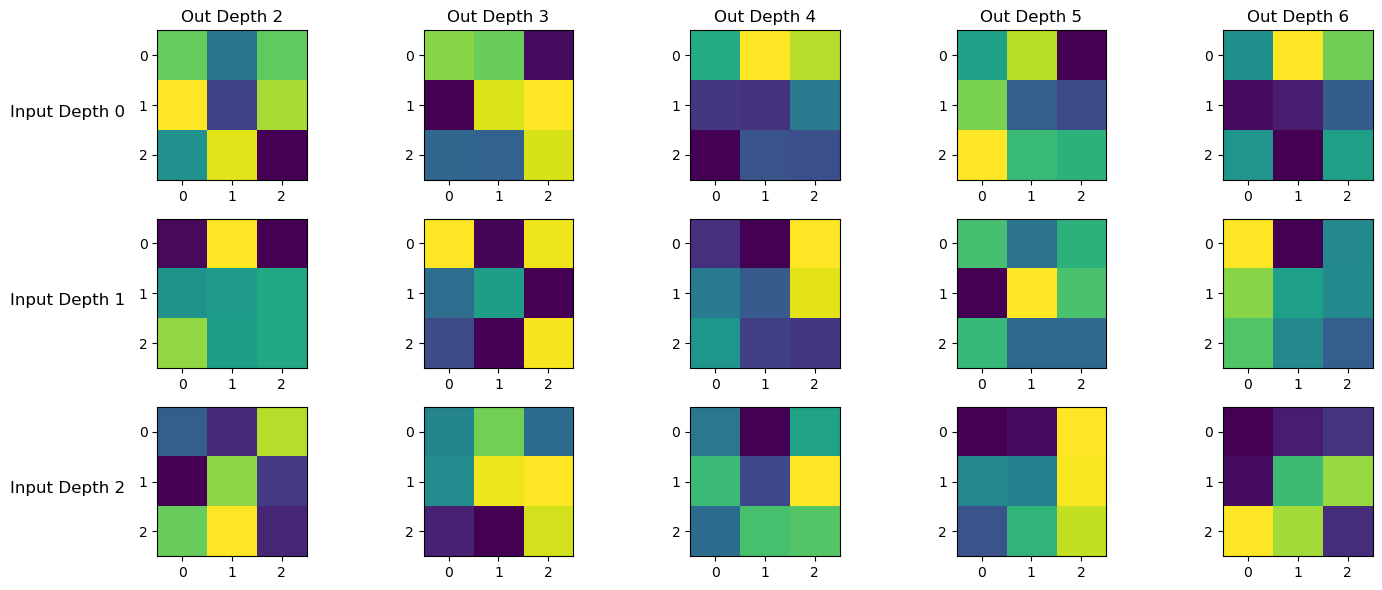

In [135]:
def filters(idx):
    layer_name = 'conv2d_28'
    filters, biases = model.get_layer(layer_name).get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    fig, axes =  plt.subplots(3, 5, figsize=(15, 6))
    cols = ['Out Depth {}'.format(col+idx) for col in range(5)]
    rows = ['Input Depth {}'.format(row) for row in range(3)]
    for ax, col in zip(axes[0], cols):
        ax.set_title(col)
    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row, rotation=0, size='large')
        ax.yaxis.set_label_coords(-.6,.4)
    for i in range(3):
        for j in range(5):
            axes[i,j].imshow(filters[:, :, i, idx+j])
    fig.tight_layout()
    plt.show()
    
filters(2)    

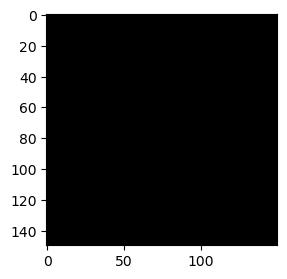

In [166]:
input_img_data = np.zeros((1, 150, 150, 3)) * 20 + 128
plt.figure(figsize=(3, 3))
plt.imshow(array_to_img(input_img_data[0]))
plt.show()

In [163]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    print(input_img_data.shape)
    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return array_to_img(img)

def show_filters(layer_name):
    size = 64
    margin = 5
    layout = 4

    results = np.zeros((layout * size + (layout-1) * margin, layout * size + (layout-1) * margin, 3))
    for i in range(layout):  # iterate over the rows of our results grid
        for j in range(layout):  # iterate over the columns of our results grid
            filter_img = generate_pattern(layer_name, i + (j * layout), size=size)
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    plt.figure(figsize=(3, 3))
    plt.imshow(array_to_img(results))
    plt.show()

In [164]:
model = VGG16(weights='imagenet', include_top=False)
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']
interact(show_filters, layer_name=layer_names);

interactive(children=(Dropdown(description='layer_name', options=('block1_conv1', 'block2_conv1', 'block3_conv…

## Heatmaps of Class Activation
The technique used for understanding which parts of a given image led a convnet to its final classification decision is called class activation map (CAM) visualization.

A class activation heatmap is a matrix of scores associated with a specific output class. Let's use the VGG16 model and an elephant picture as an example. The final convolutional layer in VGG16 is called "block5_conv3" and has an output shape of (None, 14, 14, 512), which consists of 512 14x14 filter images.

\begin{align*}
\text{Heatmap} = \sum_{\text{sum over 512 filter images}} \big( \text{each 14 $\times$ 14 filter image} \big) \times \text{weight}
\end{align*}

where `weight` shows how important this filter is with regard to the "elephant" class and, techniqually, is related to gradient of the of the "elephant" class with regard to the output of layer `block5_conv3`.

Given an image fed into VGG16, CAM visualization overlays the heatmap on the image and indicates how important each location in the image is with respect to the class under consideration.

The following code block contains functions that generate heatmaps and display class activation map.

In [ ]:
def make_gradcam_heatmap(model, img_path, pred_index=None):
    import tensorflow as tf
    last_conv_layer_name = [layer for layer in model.layers if 'conv' in layer.name][-1].name
    
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    img = load_img(img_path, target_size=model.layers[0].output_shape[0][1:3])
    img_array = preprocess_input(np.expand_dims(img_to_array(img), axis=0))
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(heatmap, img_path, alpha=0.4):
    from matplotlib.pyplot import get_cmap
    # Load the original image
    
    img = load_img(img_path)
    img_array = img_to_array(img)    
    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array.shape[1], img_array.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img_array
    superimposed_img = array_to_img(superimposed_img)

    # Display Grad CAM
    #plt.matshow(deprocess_image(superimposed_img))
    plt.imshow(superimposed_img)
    plt.show()

The default code uses the VGG16 model on an elephant picture. You can uncomment the code to use the Xception model or a picture of a cat and a dog. Changing the `pred_index` value (the default value None indicating the predicted class) to another class will show the class activation map of that specific class.

For instance, the CAM visualization shows that the Xception model predicts the cat and dog as the top two classes, while VGG16 fails to predict the cat class.

1/1 [==============================] - 0s 265ms/step
Preds index [386 101 385]
Predicted: [('n02504458', 'African_elephant', 0.90942127), ('n01871265', 'tusker', 0.08618274), ('n02504013', 'Indian_elephant', 0.0043545836)]


<Figure size 100x100 with 0 Axes>

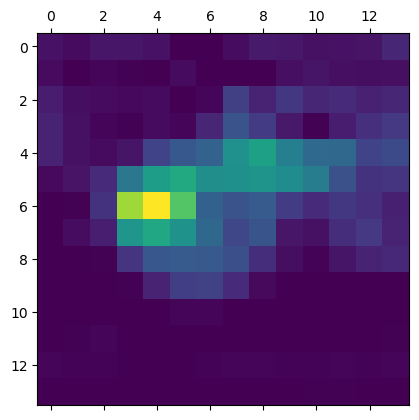

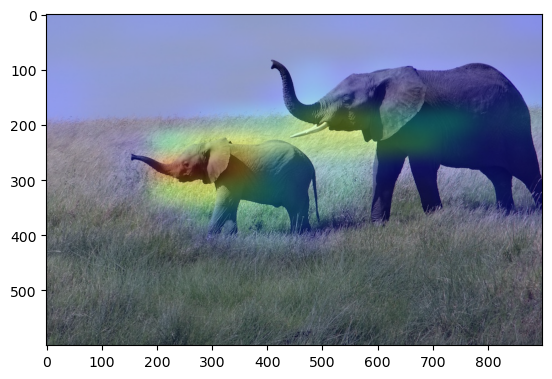

In [92]:
model = VGG16(weights='imagenet')
from keras.applications.vgg16 import preprocess_input, decode_predictions

# model = xception.Xception(weights='imagenet')
# from keras.applications.xception import preprocess_input, decode_predictions
  
img_path = get_file(origin=base+'figures/african_elephant.jpg')
# img_path = get_file(origin=base+'figures/cat_and_dog.jpg') 

img = load_img(img_path, target_size=model.layers[0].output_shape[0][1:3])
img_array = preprocess_input(np.expand_dims(img_to_array(img), axis=0))
preds = model.predict(img_array) # with shape (1, 1000)
# print('argmax(preds):', np.argmax(preds[0]))
print('Preds index', (-preds[0]).argsort()[:3])
print('Predicted:', decode_predictions(preds, top=3)[0])

heatmap = make_gradcam_heatmap(model, img_path, pred_index=None)
plt.figure(figsize=(1, 1))
plt.matshow(heatmap)
plt.show()
display_gradcam(heatmap, img_path)

# Introduction to Computer Vision

Computer vision is an interdisciplinary field that deals with how computers can be made to gain a high-level understanding of digital images or videos. There are several levels of granularity in which computers can understand images.

1. Image classification: This is the most fundamental building block in computer vision. Given an image, the computer outputs a label, which identifies the main object in the image. We have demonstrated image classification with examples such as MNIST and Dogs vs. Cats.

2. Classification with Localization: The computer not only outputs the classification label but also localizes where the object is present in the image by drawing a bounding box around it.

3. Object Detection: Object detection extends localization to the images containing multiple objects. The task is to classify and localize all the objects in the image.

4. Semantic Segmentation: It is a pixel-level image classification. The expected output is a high resolution image in which each pixel is classified to a particular class.

5. Instance segmentation: It is one step ahead of semantic segmentation, wherein the computer classifies each instance of a class separately along with pixel-level classification.

The figure below shows their connections and differences.

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/res/Computer_Vision/figures/segmentation.png" width="700">

##  Applications

### Autonomous vehicles
Autonomous driving is a complex robotics tasks that requires perception, planning and execution within constantly evolving environments. This task also needs to be performed with utmost precision, since safety is of paramount importance. Semantic Segmentation provides information about free space on the roads, as well as to detect lane markings and traffic signs.


<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/res/Computer_Vision/figures/video-road-scene-seg-1.webp" width="700">

### Bio Medical Image Diagnosis
Machines can augment analysis performed by radiologists, greatly reducing the time required to run diagnostic tests.

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/res/Computer_Vision/figures/chest.jpg" width="400">

## U-Net

The U-Net is a powerful encoder-decoder convolutional neural network architecture for semantic segmentation.


a specific convolutional network architecture used for semantic segmentation, and it is also used in the stable diffusion model. 

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/res/Computer_Vision/figures/Unet2D.webp" width="700">